# 1. Data Exploration and Preprocessing

In [1]:
#import numpy as np
#data1 = np.loadtxt(r"Alphabets_data.csv", delimiter= ",")  # won't work as it has categorical column

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv(r"Alphabets_data.csv", header=0) # load dataset 

In [4]:
data.head() # display top 5 rows 

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
data.shape  # rows, columns

(20000, 17)

samples, features: 20000 samples and 17 features

In [6]:
from collections import Counter
counter = Counter(data['letter'])

In [7]:
counter   # gives classes with their count no. 

Counter({'T': 796,
         'I': 755,
         'D': 805,
         'N': 783,
         'G': 773,
         'S': 748,
         'B': 766,
         'A': 789,
         'J': 747,
         'M': 792,
         'X': 787,
         'O': 753,
         'R': 758,
         'F': 775,
         'C': 736,
         'H': 734,
         'W': 752,
         'L': 761,
         'P': 803,
         'E': 768,
         'V': 764,
         'Y': 786,
         'Q': 783,
         'U': 813,
         'K': 739,
         'Z': 734})

In [8]:
data.isnull().sum()  # no null value in the dataset

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [9]:
data.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [10]:
data[data.duplicated()]  # print duplicated rows 

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [11]:
data = data.drop_duplicates()  # remove duplicated rows 

In [12]:
data[data.duplicated()]  # there is no duplicated row now

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex


In [13]:
data.shape

(18668, 17)

samples, features: 18668 samples and 17 features

In [14]:
counter = Counter(data['letter'])
counter   # gives classes with their count no. 

Counter({'T': 748,
         'I': 524,
         'D': 760,
         'N': 688,
         'G': 743,
         'S': 729,
         'B': 730,
         'A': 756,
         'J': 715,
         'M': 732,
         'X': 678,
         'O': 718,
         'R': 737,
         'F': 752,
         'C': 710,
         'H': 704,
         'W': 726,
         'L': 673,
         'P': 782,
         'E': 725,
         'V': 706,
         'Y': 746,
         'Q': 760,
         'U': 768,
         'K': 718,
         'Z': 640})

# Encode categorical variables

In [15]:
colname = ['letter']

In [16]:
from sklearn.preprocessing import LabelEncoder  # import LabelEncoder function from sublib. preprocessing
le = LabelEncoder()  # save this function in var. le
for x in colname: # x is letter
    data[x] = le.fit_transform(data[x]) # it will tranform categorical column into numeric column using LabelEncoder func
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))  # representation in dictionary format 
    print('Feature',x)
    print('mapping', le_name_mapping)

Feature letter
mapping {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


In [17]:
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [18]:
data = data.to_numpy() # convert dataframe to numpy array

In [19]:
data # data in the form of matrix can be directly use in tensorflow lib. 

array([[19,  2,  8, ...,  8,  0,  8],
       [ 8,  5, 12, ...,  8,  4, 10],
       [ 3,  4, 11, ...,  7,  3,  9],
       ...,
       [ 2,  7, 10, ...,  9,  3,  7],
       [19,  6,  9, ..., 12,  2,  4],
       [ 0,  4,  9, ...,  7,  2,  8]], dtype=int64)

In [20]:
len(data)

18668

# 2. Model Implementation

In [21]:
# define X and Y 
X = data[:,1:]
Y = data[:,0]

In [22]:
X

array([[ 2,  8,  3, ...,  8,  0,  8],
       [ 5, 12,  3, ...,  8,  4, 10],
       [ 4, 11,  6, ...,  7,  3,  9],
       ...,
       [ 7, 10,  8, ...,  9,  3,  7],
       [ 6,  9,  6, ..., 12,  2,  4],
       [ 4,  9,  6, ...,  7,  2,  8]], dtype=int64)

In [23]:
Y

array([19,  8,  3, ...,  2, 19,  0], dtype=int64)

In [24]:
from tensorflow.keras.models import Sequential # import Sequential function from tensorflow lib. to create ANN model 
model = Sequential() # save this func in var. model

In [25]:
model

In [26]:
# structure of model
# activation function add non-linearity to Neural Network 
from tensorflow.keras.layers import Dense # Dense func is used to create input, hidden and output layer

model.add(Dense(20,input_dim = 16, activation = 'relu')) # create 20 input layers (each input layer has 16 neurons as we have 16 input features)

model.add(Dense(10, activation= 'relu'))   # hidden layers
model.add(Dense(10, activation= 'relu'))


model.add(Dense(1,activation='tanh'))  # output layer (activation func tanh)

In [27]:
# once structure of our model is created, we can compile our model 
# adam is an optimizer which checks the difference between actual & predicted value (known as loss) for each row
# average loss for one epoch is calculated by categorical_crossentropy for multi classification 

model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                340       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 671
Trainable params: 671
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [29]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [30]:
#  testing data is 20%, therefore, hyperparameter validation_split = 0.20 i.e. 18668 x 0.20 = 3733.6
# training data = 18668 - 3733.6 = 14934.4 (80% data) 
# since batch size = 32 , so, training data = 14934.4/ 32 = 466.7

history = model.fit(X_train,Y_train, epochs= 50, batch_size = 32)

Epoch 1/50
467/467 [==============================] - 3s 2ms/step - loss: 1.4900e-06 - accuracy: 0.0380
Epoch 2/50
467/467 [==============================] - 1s 2ms/step - loss: 1.4900e-06 - accuracy: 0.0380
Epoch 3/50
467/467 [==============================] - 1s 2ms/step - loss: 1.4900e-06 - accuracy: 0.0380
Epoch 4/50
467/467 [==============================] - 1s 2ms/step - loss: 1.4900e-06 - accuracy: 0.0380
Epoch 5/50
467/467 [==============================] - 1s 2ms/step - loss: 1.4900e-06 - accuracy: 0.0380
Epoch 6/50
467/467 [==============================] - 1s 2ms/step - loss: 1.4900e-06 - accuracy: 0.0380
Epoch 7/50
467/467 [==============================] - 1s 2ms/step - loss: 1.4900e-06 - accuracy: 0.0380
Epoch 8/50
467/467 [==============================] - 1s 2ms/step - loss: 1.4900e-06 - accuracy: 0.0380
Epoch 9/50
467/467 [==============================] - 1s 2ms/step - loss: 1.4900e-06 - accuracy: 0.0380
Epoch 10/50
467/467 [==============================] - 1s 2ms/st

In [31]:
history

In [32]:
scores = model.evaluate(X,Y)

584/584 [==============================] - 1s 2ms/step - loss: 1.4871e-06 - accuracy: 0.0391


In [33]:
scores = model.evaluate(X,Y)
print("%s:%.2f%%"%( model.metrics_names[1],scores[1]*100))

584/584 [==============================] - 1s 2ms/step - loss: 1.4871e-06 - accuracy: 0.0391
accuracy:3.91%


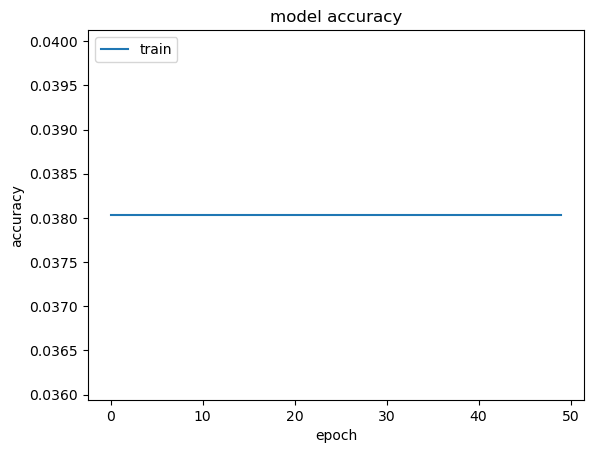

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy']) # accuracy of model on training data
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train'], loc = 'upper left')
plt.show()

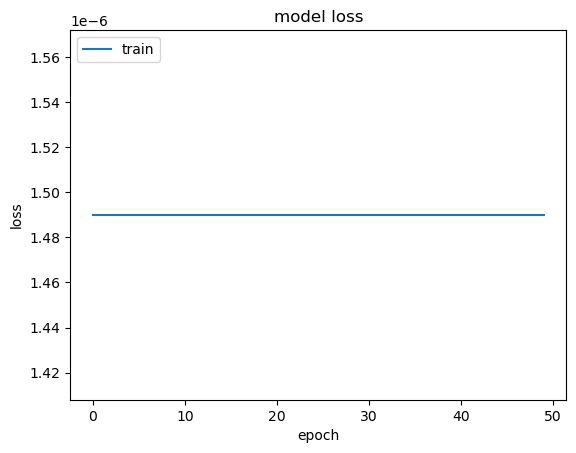

In [35]:
plt.plot(history.history['loss']) # training loss
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'], loc = 'upper left')
plt.show()

# Predict the Test Set Results-

In [36]:
Y_pred = model.predict(X_test)

117/117 [==============================] - 0s 1ms/step


In [37]:
Y_pred

array([[1.        ],
       [1.        ],
       [1.        ],
       ...,
       [1.        ],
       [1.        ],
       [0.99999833]], dtype=float32)